In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import re
from os import walk
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tool import *

In [7]:
# aspect setting
asp_dict = pd.read_pickle('../data/setting/aspect.pkl')    
pdir = "../model_result" # /history 
Score = "F1_score" # Loss F1_score

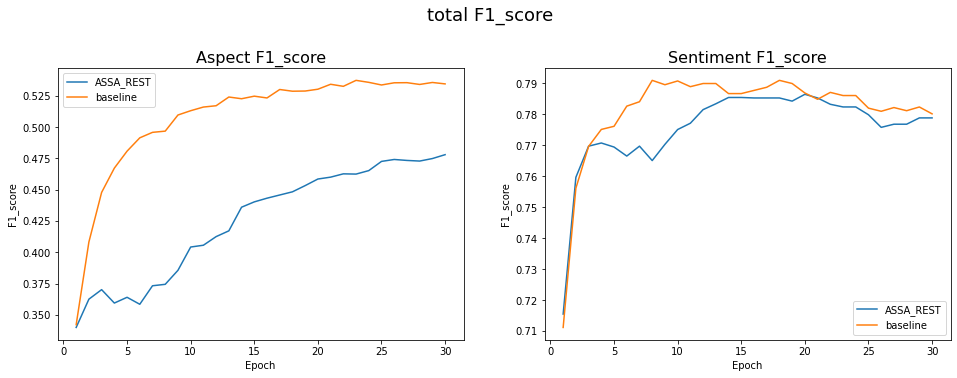

In [23]:
#  # YELP_JASA_w1 baseline YELP_JASA_w1 TGCN_0.3_v10
mver_l = ['ASSA_REST','baseline'] 
# mver_l = ['AMAZON_g1_v1','AMAZON_g2_v1'] 
# mver_l = ['AMAZON_baseline','ASSA_LAPTOP','AMAZON_g1_v1','AMAZON_g2_v1'] 
# mver_l = ['AMAZON_g2_v2','AMAZON_baseline','ASSA_LAPTOP'] 

domain = "YELP"
Round_total = 1
epoch_filter = None
title = 'total'

# 畫出列表中的模型結果
all_data =  read_mverlist(mver_l,domain,Round_total,pdir, epoch_filter)
plot_result_list(all_data, Score, mver_l, title)

In [9]:
all_data[all_data['Epoch']==10][['name','AF1_score','SF1_score']]

,name,AF1_score,SF1_score
9,AMAZON_g1_v1,0.733122,0.750292
9,AMAZON_g2_v1,0.701301,0.716099


In [10]:
# aspect
(all_data[all_data['Epoch']==10][['AAccuracy', 'APrecision', 'ARecall','AF1_score']] * 100).round(2)

,AAccuracy,APrecision,ARecall,AF1_score
9,74.24,73.64,74.19,73.31
9,71.84,70.79,71.51,70.13


In [11]:
# sentiment
(all_data[all_data['Epoch']==10][['SAccuracy', 'SPrecision', 'SRecall','SF1_score']] * 100).round(2)

,SAccuracy,SPrecision,SRecall,SF1_score
9,75.04,75.83,75.62,75.03
9,72.16,71.51,71.79,71.61


### seed 長什麼樣

In [ ]:
# YELP_textGCN YELP_JASA_w1 TGCN_0.3_v10 ASSA_LAPTOP

In [19]:
mver = 'ASSA_LAPTOP' 
dataset = 'AMAZON'
path = f'../seed/{dataset}/{mver}/GCN_seed_R'
# path = f'../model_result/{mver}/GCN_seed_R'

seed_df = seeds_to_df(path,1,dataset,5,True, asp_dict)
seed_df['seeds_str'] = seed_df.apply(lambda row: join_list(row['seeds']), axis=1)

seed_df[['aspect','sentiment','seeds_str']].sort_values(['aspect'])

,aspect,sentiment,seeds_str
3,BATTERY,pos,light perfect price laptop pros
11,BATTERY,neg,motherboard description tried happen middle
4,COMPANY,pos,price thank gift amazon loves
12,COMPANY,neg,motherboard horrible poor plastic worse
2,DISPLAY,pos,fast price works laptop perfect
10,DISPLAY,neg,que washed reason poor cause
7,KEYBOARD,pos,tablet always perfect chromebook convenient
15,KEYBOARD,neg,sounds cheap heat poor bottom
5,MOUSE,pos,little laptop num easy fast
13,MOUSE,neg,words typed jumps letter text


In [41]:
prob_df =  pd.read_csv(f'../model_result/{mver}/R1_testl.csv')
prob_df.columns = ['aspect','mask','pos','neg'] # ['aspect','word','pos','neg']